In [1]:
import pandas as pd
from desc.tic_investigation import *
data = pd.read_csv('../mock/cuestionario_completo.csv')

# Inicializamos un diccionario para almacenar resultados estadísticos
statistical_summary = {
    "Column": [],
    "Mean": [],
    "Median": [],
    "Mode": [],
    "Variance": [],
    "Standard Deviation": []
}

# Iteramos sobre las columnas numéricas para calcular medidas estadísticas
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    # Excluimos NaN al calcular estadísticas
    col_data = data[col].dropna()
    statistical_summary["Column"].append(col)
    statistical_summary["Mean"].append(col_data.mean())
    statistical_summary["Median"].append(col_data.median())
    mode_val = col_data.mode()
    statistical_summary["Mode"].append(mode_val[0] if not mode_val.empty else np.nan)
    statistical_summary["Variance"].append(col_data.var())
    statistical_summary["Standard Deviation"].append(col_data.std())

# Convertimos el diccionario en un DataFrame para visualizar el resumen estadístico
summary_df = pd.DataFrame(statistical_summary)
print(summary_df)



                           Column        Mean  Median  Mode      Variance  \
0                            edad   21.136364    21.0  21.0     13.227273   
1        dispositivos_disponibles    2.196970     2.0   2.0      0.745221   
2                calidad_internet    3.651515     4.0   4.0      0.907459   
3        uso_plataforma_educativa    3.000000     3.0   3.0      1.415385   
4                uso_db_academica    2.954545     3.0   3.0      1.028671   
5           uso_software_analisis    3.106061     3.0   3.0      1.265501   
6   uso_herramientas_colaboracion    3.909091     4.0   4.0      0.914685   
7                uso_sm_educativa    3.712121     4.0   3.0      1.069697   
8                  uso_tiempo_tic  166.875000    90.0  90.0  12167.857143   
9                   comp_busqueda    3.424242     3.0   3.0      1.017249   
10                      comp_data    3.409091     3.0   3.0      0.830070   
11                  comp_analisis    2.893939     3.0   3.0      1.265501   

In [2]:

df = cargar_y_limpiar_datos('../mock/cuestionario_completo.csv')
df

/home/prantony/Desc/desc/tic_investigation.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/home/prantony/Desc/desc/tic_investigation.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

,Id,edad,genero,año,dispositivos_disponibles,tipo_conexion,calidad_internet,uso_plataforma_educativa,uso_db_academica,uso_software_analisis,uso_herramientas_colaboracion,uso_sm_educativa,uso_tiempo_tic,comp_busqueda,comp_data,comp_analisis,comp_presentacion,comp_programacion
0,10R,24,Masculino,4°,2,Fibra óptica,4,5,4,4,4,4,330.0,4,4,4,4,4
1,11R,24,Masculino,4°,1,Fibra óptica,3,3,3,2,4,4,90.0,3,4,2,3,2
2,12R,21,Masculino,4°,1,4G/5G,1,4,2,1,4,5,90.0,2,3,1,3,1
3,13R,21,Masculino,4°,2,4G/5G,3,1,3,3,3,1,90.0,2,3,3,2,3
4,14A,22,Masculino,3°,2,4G/5G,3,2,2,4,4,3,210.0,3,4,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,7R,21,Masculino,5°,1,4G/5G,1,3,2,5,2,4,210.0,2,4,2,4,2
62,8R,22,Femenino,5°,2,Ninguna,4,2,4,4,5,3,90.0,4,4,4,4,3
63,9R,22,Femenino,5°,1,4G/5G,1,3,3,3,3,3,90.0,3,3,3,4,4
64,65P,23,Masculino,1°,4,Fibra óptica,4,3,2,2,5,4,210.0,3,2,1,2,1


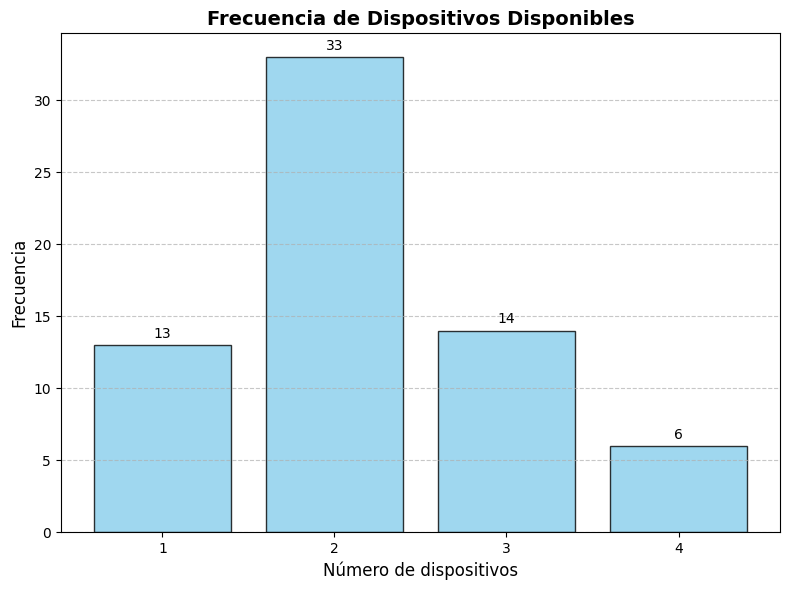

In [10]:
import matplotlib.pyplot as plt
import numpy as np

datos = pd.read_csv('../mock/cuestionario_completo.csv')


# Datos para la gráfica de barras
frecuencias = datos['dispositivos_disponibles'].value_counts().sort_index()
categorias = frecuencias.index
valores = frecuencias.values

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
bars = plt.bar(categorias, valores, color='skyblue', alpha=0.8, edgecolor='black')

# Añadir etiquetas encima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, altura + 0.5, f'{int(altura)}', ha='center', fontsize=10, color='black')

# Mejorar estilo del gráfico
plt.title('Frecuencia de Dispositivos Disponibles', fontsize=14, fontweight='bold')
plt.xlabel('Número de dispositivos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(categorias, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de rejilla discretas

# Mostrar el gráfico
plt.tight_layout()
plt.show()




In [28]:
from desc.frecuence import FrequencyAnalysis

tiempo_uso = datos["uso_tiempo_tic"].dropna()
analisis = FrequencyAnalysis(tiempo_uso)

analisis.create_distribution_table()

,I,mi,fi,hi,%i,Fi,Hi,$i
1,[ 30.0 - 75.0 ),52.5,8,0.125000,12.5000,8,0.125000,12.5000
2,[ 75.0 - 120.0 ),97.5,25,0.390625,39.0625,33,0.515625,51.5625
3,[ 120.0 - 165.0 ),142.5,0,0.000000,0.0000,33,0.515625,51.5625
4,[ 165.0 - 210.0 ),187.5,0,0.000000,0.0000,33,0.515625,51.5625
5,[ 210.0 - 255.0 ),232.5,20,0.312500,31.2500,53,0.828125,82.8125
6,[ 255.0 - 300.0 ),277.5,0,0.000000,0.0000,53,0.828125,82.8125
7,[ 300.0 - 345.0 ),322.5,5,0.078125,7.8125,58,0.906250,90.6250
8,[ 345.0 - 390.0 ],367.5,6,0.093750,9.3750,64,1.000000,100.0000


In [4]:
analisis_competencias_digitales(df)

{'perfiles_competencias':                       comp_busqueda  comp_analisis  comp_presentacion  \
 cluster_competencias                                                    
 0                            3.0000           2.96               3.32   
 1                            4.4000           3.72               4.40   
 2                            2.5625           1.50               2.75   
 
                       comp_data  comp_programacion  
 cluster_competencias                                
 0                        3.4400              2.400  
 1                        4.0800              3.640  
 2                        2.3125              1.625  ,
 'distribucion_clusters': cluster_competencias
 1    25
 0    25
 2    16
 Name: count, dtype: int64,
 'inertias': [329.99999999999994,
  193.25068233664092,
  154.3497819395639,
  138.63464809124707,
  120.92883301056277]}

In [5]:
analisis_rendimiento(df)

KeyError: "['horas_estudio', 'uso_plataforma'] not in index"

/home/prantony/Desc/desc/tic_investigation.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/home/prantony/Desc/desc/tic_investigation.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

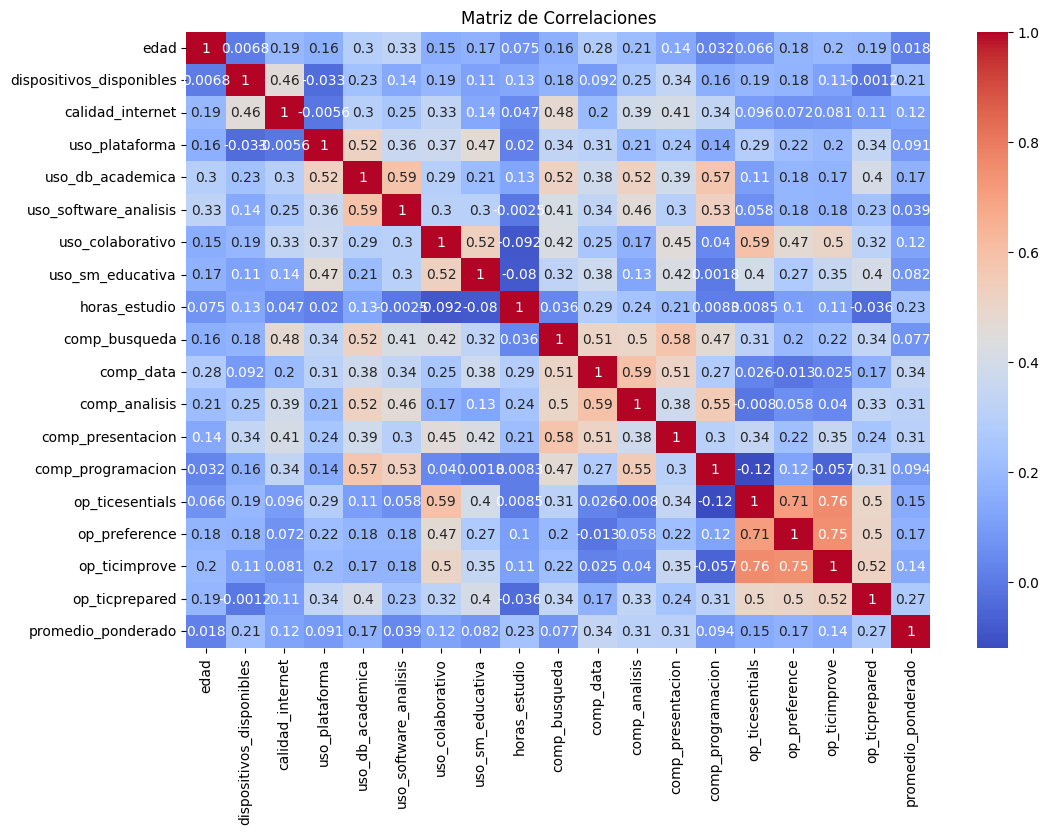

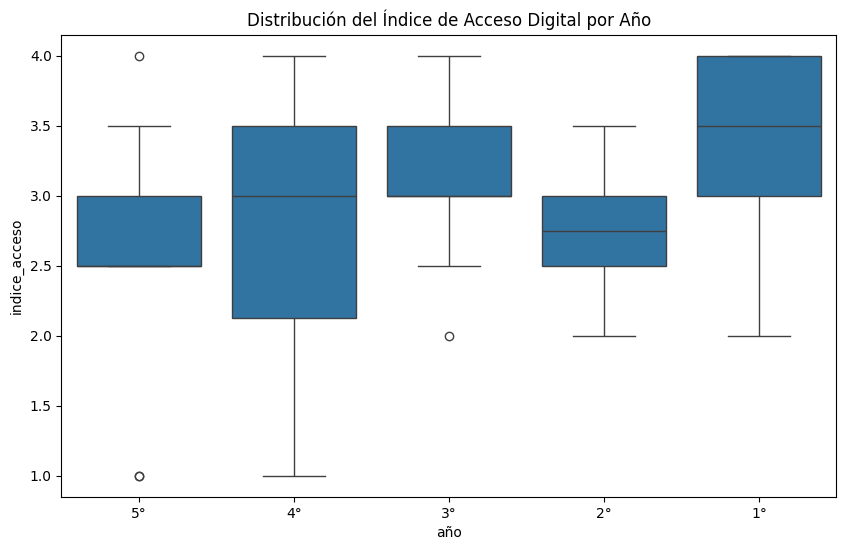


    REPORTE DE ANÁLISIS DE INNOVACIÓN DIGITAL Y RENDIMIENTO ACADÉMICO
    
    1. ESTADÍSTICAS DESCRIPTIVAS
    ---------------------------
                edad  dispositivos_disponibles  calidad_internet  uso_plataforma  \
count  62.000000                 62.000000         62.000000       62.000000   
mean   21.225806                  2.193548          3.677419        3.080645   
std     3.686125                  0.846182          0.971296        1.163635   
min    17.000000                  1.000000          1.000000        1.000000   
25%    20.000000                  2.000000          3.000000        2.000000   
50%    21.000000                  2.000000          4.000000        3.000000   
75%    22.000000                  3.000000          4.000000        4.000000   
max    45.000000                  4.000000          5.000000        5.000000   

       uso_db_academica  uso_software_analisis  uso_colaborativo  \
count         62.000000              62.000000         62.000000  

In [ ]:
df, resultados, reporte = ejecutar_analisis_completo('../mock/cuestionario_completo.csv')
print(reporte)